In [100]:
from manim import *

SyntaxError: invalid syntax (1490513988.py, line 3)

In [50]:
%%manim -ql -v WARNING Intro

from manim import *

class Intro(Scene):
    def construct(self):
        titulo = Text("Ecuación de onda").move_to(UP * 2).scale(2)
        eqn = MathTex(r"\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}", color=YELLOW).scale(2)
        self.play(Write(titulo))
        self.play(Write(eqn))
        self.wait(3)

In [51]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = Intro()
scene.render()

In [52]:
%%manim -ql -v WARNING Temas

from manim import *

class Temas(Scene):
    def construct(self):
        titulo = Text("Temas a tratar:").move_to(UP * 3.5).scale(1.5)

        temas = BulletedList(
            "Introducción e historia breve de la ecuación de onda",
            "Deduciendo la ecuación de onda de F=ma",
            "Ecuación de onda y ejemplos",
            "Soluciones de la ecuación de onda",
            "Importancia de la ecuación de onda",
            dot_scale_factor=1.2,
        ).scale(0.8)

        self.play(Write(titulo))
        self.play(FadeIn(temas, shift=UP))
        self.wait(3)

In [53]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = Temas()
scene.render()

## Escenas siguientes:

In [58]:
%%manim -ql -v WARNING Curvecontenido

from manim import *

class Curvecontenido(Scene):
    def construct(self):
        L = 15  # Longitud del eje x
        a = L / 2  # Semieje mayor (a lo largo del eje X)
        b = 3  # Semieje menor (a lo largo del eje Y)

        axes = Axes(
            x_range=[0, L + 5, 1],  # Rango del eje x de 0 a L + 5
            y_range=[0, b + 1, 1],  # Rango del eje y
            axis_config={"color": WHITE, "include_numbers": False}
        ).scale(0.8)  # Hacer que el gráfico inicial sea un poco más pequeño

        # Etiquetas de los ejes
        x_label = MathTex("x").next_to(axes.x_axis, RIGHT)
        y_label = MathTex("u").next_to(axes.y_axis, UP)

        # Añadir etiquetas en 0 y L manualmente
        label_0 = MathTex("0").next_to(axes.c2p(0, 0), DOWN)
        label_L = MathTex("L").next_to(axes.c2p(L, 0), DOWN)

        # Definir la curva (una parábola desde x=0 hasta x=L)
        curve = axes.plot_parametric_curve(
            lambda t: np.array([t, b * (1 - (2 * (t - a) / L)**2)]),
            t_range=[0, L],
            color=WHITE
        )

        # Definir los puntos en la curva y segmentos
        x0 = 3
        x1 = 4.5
        y0 = b * (1 - (2 * (x0 - a) / L)**2)
        y1 = b * (1 - (2 * (x1 - a) / L)**2)
        
        dot1 = Dot(axes.c2p(x0, y0))
        dot2 = Dot(axes.c2p(x1, y1))
        
        # Segmento de cuerda
        chord = Line(axes.c2p(x0, y0), axes.c2p(x1, y1), color=BLUE)
        
        # Etiquetas de los puntos
        label_x = MathTex("x").next_to(dot1, DOWN, buff=1)  # Aumentar el espacio buffer
        label_x_dx = MathTex("x + \\Delta x").next_to(dot2, DOWN, buff=1)  # Aumentar el espacio buffer
        
        # Etiqueta del segmento Δs
        delta_s_label = MathTex("\\Delta s").next_to(chord, UP, buff=0.2)
        
        # Punto u(x)
        x_u = 10  # Coordenada x del punto u(x)
        y_u = b * (1 - (2 * (x_u - a) / L)**2)
        dot_u = Dot(axes.c2p(x_u, y_u), color=RED)
        label_u = MathTex("u(x, t)").next_to(dot_u, UP, buff=0.2)

        # Línea vertical para el punto u(x, t)
        v_line_u = DashedLine(axes.c2p(x_u, 0), axes.c2p(x_u, y_u), color=WHITE)
        
        # Agrupar todos los elementos del gráfico
        graph_group = VGroup(
            axes, x_label, y_label, label_0, label_L, curve,
            dot1, dot2, chord, label_x, label_x_dx, delta_s_label,
            dot_u, label_u, v_line_u
        )

        # Añadir elementos a la escena
        self.play(Create(axes), Write(x_label), Write(y_label))
        self.play(Write(label_0), Write(label_L))
        self.play(Create(curve))
        self.play(Create(dot1), Create(dot2))
        self.play(Create(chord))
        self.play(Write(label_x))
        self.play(Write(label_x_dx))
        self.play(Write(delta_s_label))
        self.play(Create(dot_u), Write(label_u))
        self.play(Create(v_line_u))

        self.wait(2)

        # Transición para achicar el gráfico sin deformarlo
        self.play(graph_group.animate.scale(0.5).to_edge(LEFT))

        self.wait(2)

        # Añadir la explicación sobre u(x,t)
        explanation = MathTex(
            r"u(x, t) \text{ son los desplazamientos verticales de la cuerda desde la posición de reposo.}"
        ).scale(0.7).to_edge(UP)

        self.play(Write(explanation))

        self.wait(2)

        # Añadir la ecuación de onda
        wave_equation = VGroup(
            MathTex(r"\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}"),
            MathTex(r"c = \text{velocidad de la onda}")
        ).arrange(DOWN).scale(0.9).next_to(explanation, DOWN, buff=0.5)

        self.play(Write(wave_equation))

        self.wait(2)

In [59]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = Curvecontenido()
scene.render()

In [60]:
%%manim -ql -v WARNING SegmentedCurvecontenido

from manim import *

class SegmentedCurvecontenido(Scene):
    def construct(self):
        L = 10
        a = L / 2
        b = 3

        axes = Axes(
            x_range=[0, L, 1],
            y_range=[0, b + 2, 1],  # Incrementar el rango del eje y
            axis_config={"color": WHITE, "include_numbers": False}
        )

        x_label = MathTex("x").next_to(axes.x_axis, RIGHT)
        y_label = MathTex("u").next_to(axes.y_axis, UP)

        label_0 = MathTex("0").next_to(axes.c2p(0, 0), DOWN)
        label_L = MathTex("L").next_to(axes.c2p(L, 0), DOWN)

        # Definir los puntos en el eje
        x0 = 3
        x1 = 7
        y0 = 2  # Primer punto más alto
        y1 = 3  # Segundo punto más alto

        dot1 = Dot(axes.c2p(x0, y0))
        dot2 = Dot(axes.c2p(x1, y1))

        # Segmento curvo usando una curva bézier cúbica con menos curvatura
        curve = CubicBezier(
            axes.c2p(x0, y0),
            axes.c2p((2 * x0 + x1) / 3, (2 * y0 + y1) / 3 + 0.2),
            axes.c2p((x0 + 2 * x1) / 3, (y0 + 2 * y1) / 3 + 0.2),
            axes.c2p(x1, y1),
            color=BLUE
        )

        h_line1 = DashedLine(axes.c2p(x0, 0), axes.c2p(x0, y0), color=WHITE)
        v_line1 = DashedLine(axes.c2p(0, y0), axes.c2p(x0, y0), color=WHITE)

        h_line2 = DashedLine(axes.c2p(x1, 0), axes.c2p(x1, y1), color=WHITE)
        v_line2 = DashedLine(axes.c2p(0, y1), axes.c2p(x1, y1), color=WHITE)

        T1_vector = Arrow(start=axes.c2p(x0, y0), end=axes.c2p(x0-1.5, y0-1.5), color=ORANGE, buff=0, stroke_width=5)
        T2_vector = Arrow(start=axes.c2p(x1, y1), end=axes.c2p(x1+1.5, y1+1.5), color=ORANGE, buff=0, stroke_width=5)

        # Líneas horizontales desde los puntos de los vectores de tensión
        h_line1_vector = DashedLine(axes.c2p(x0, y0), axes.c2p(x0 - 1.5, y0), color=WHITE)
        h_line2_vector = DashedLine(axes.c2p(x1, y1), axes.c2p(x1 + 1.5, y1), color=WHITE)

        T1_label = MathTex("T_1", color=ORANGE).next_to(T1_vector, LEFT, buff=0.1)
        T2_label = MathTex("T_2", color=ORANGE).next_to(T2_vector, RIGHT, buff=0.1)

        # Dibujar los ángulos
        arc1 = Arc(radius=0.5, start_angle=PI, angle=PI/4, color=YELLOW).move_arc_center_to(axes.c2p(x0, y0))
        arc2 = Arc(radius=0.5, start_angle=0, angle=PI/4, color=YELLOW).move_arc_center_to(axes.c2p(x1, y1))

        theta1 = MathTex("\\theta", color=YELLOW).next_to(arc1, UP, buff=0.1)
        theta2 = MathTex("\\theta + \\Delta theta", color=YELLOW).next_to(arc2, UP, buff=0.1)

        label_x = MathTex("x").next_to(dot1, DOWN, buff=0.5)
        label_x_dx = MathTex("x + \\Delta x").next_to(dot2, DOWN, buff=0.5)

        delta_s_label = MathTex("\\Delta s").next_to(curve, UP, buff=0.2)

        # Crear un grupo de todos los elementos del gráfico
        graph_group = VGroup(
            axes, x_label, y_label, label_0, label_L, dot1, dot2, curve,
            h_line1, v_line1, h_line2, v_line2, h_line1_vector, h_line2_vector,
            T1_vector, T2_vector, T1_label, T2_label, arc1, arc2, theta1, theta2,
            label_x, label_x_dx, delta_s_label
        )

        self.play(Create(axes), Write(x_label), Write(y_label))
        self.play(Write(label_0), Write(label_L))
        self.play(Create(dot1), Create(dot2))
        self.play(Create(curve))
        self.play(Create(h_line1), Create(v_line1))
        self.play(Create(h_line2), Create(v_line2))
        self.play(Create(h_line1_vector), Create(h_line2_vector))
        self.play(Create(T1_vector), Write(T1_label))
        self.play(Create(T2_vector), Write(T2_label))
        self.play(Create(arc1), Write(theta1))
        self.play(Create(arc2), Write(theta2))
        self.play(Write(label_x))
        self.play(Write(label_x_dx))
        self.play(Write(delta_s_label))

        self.wait(2)

        # Transition
        self.play(
            graph_group.animate.scale(0.265).to_edge(LEFT),
        )

        # Suponemos que:
        assumptions_text = VGroup(
            MathTex(r"\text{Para deducir la ec. de onda suponemos que:}").scale(0.5),
            MathTex(r"\bullet \text{ La cuerda es perfectamente flexible.}").scale(0.5),
            MathTex(r"\bullet \text{ La cuerda es homogénea; esto es, su masa por unidad de longitud } \rho \text{ es constante.}").scale(0.5),
            MathTex(r"\bullet \text{ Los desplazamientos } u \text{ son pequeños en comparación con la longitud de la cuerda.}").scale(0.5),
            MathTex(r"\bullet \text{ La pendiente de la curva es pequeña en todos los puntos.}").scale(0.5),
            MathTex(r"\bullet \text{ La tensión } T \text{ actúa en dirección tangente a la cuerda y su magnitud } T \text{ es igual en todos}").scale(0.5),
            MathTex(r"\text{los puntos.}").scale(0.5),
            MathTex(r"\bullet \text{ La tensión es grande en comparación con la fuerza de gravedad.}").scale(0.5),
            MathTex(r"\bullet \text{ No actúan otras fuerzas externas sobre la cuerda.}").scale(0.5),
        ).arrange(DOWN, aligned_edge=LEFT).to_edge(RIGHT).shift(DOWN * 0.5)

        self.play(Write(assumptions_text))

        self.wait(2)

        # Equation deduction
        equation = MathTex(
            r"F = ma \\",
            r"ma = \rho \Delta x \frac{\partial^2 u}{\partial t^2} \\",
            r"F = T\sin(\theta + \Delta \theta) - T\sin(\theta) \\",
            r"F = T[\tan(\theta + \Delta \theta) - \tan(\theta)] \\",
            r"F = T\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\",
            r"\frac{\partial^2 u}{\partial t^2} = \frac{T}{\rho \Delta x}\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\",
            r"\frac{\partial^2 u}{\partial t^2} = \lim_{\Delta x \to 0} \frac{T}{\rho}\frac{1}{\Delta x}\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\"
            
            
        ).scale(0.8).arrange(DOWN).to_edge(RIGHT)

        self.play(Transform(assumptions_text, equation))

        self.wait(2)

[06/21/24 20:55:44] WARNING  It looks like the scene contains a lot of sub-mobjects. Caching is      ]8;id=527398;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=913404;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             sometimes not suited to handle such large scenes, you might consider                  
                             disabling caching with --disable_caching to potentially speed up the                  
                             rendering process.                                                                    

                    WARNING  You can disable this warning by setting disable_caching_warning to True ]8;id=809387;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=711181;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py#164\164]8;;\
                             in your config file.                                                                  

In [61]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = SegmentedCurvecontenido()
scene.render()

[06/21/24 20:59:27] WARNING  It looks like the scene contains a lot of sub-mobjects. Caching is      ]8;id=794192;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=279915;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             sometimes not suited to handle such large scenes, you might consider                  
                             disabling caching with --disable_caching to potentially speed up the                  
                             rendering process.                                                                    

                    WARNING  You can disable this warning by setting disable_caching_warning to True ]8;id=892889;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=590845;file://C:\Users\sebag\anaconda3\lib\site-packages\manim\utils\hashing.py#164\164]8;;\
                             in your config file.                                                                  

In [62]:
%%manim -ql -v WARNING EquationDeduction

from manim import *

class EquationDeduction(Scene):
    def construct(self):
        # Mostrar la deducción de la ecuación paso a paso
        equation = MathTex(
            r"F = ma \\",
            r"ma = \rho \Delta x \frac{\partial^2 u}{\partial t^2} \\",
            r"F = T\sin(\theta + \Delta \theta) - T\sin(\theta) \\",
            r"F = T[\tan(\theta + \Delta \theta) - \tan(\theta)] \\",
            r"F = T\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\",
            r"\frac{\partial^2 u}{\partial t^2} = \frac{T}{\rho \Delta x}\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\",
            r"\frac{\partial^2 u}{\partial t^2} = \lim_{\Delta x \to 0} \frac{T}{\rho}\frac{1}{\Delta x}\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right) \\"
        ).scale(0.8).arrange(DOWN).move_to(ORIGIN)  # Centrar el texto

        self.play(Write(equation))

        self.wait(2)

        # Transición para dejar solo la última línea de la ecuación
        last_line = MathTex(
            r"\frac{\partial^2 u}{\partial t^2} = \lim_{\Delta x \to 0} \frac{T}{\rho}\frac{1}{\Delta x}\left(\frac{\partial u}{\partial x}(x + \Delta x, t) - \frac{\partial u}{\partial x}(x, t)\right)"
        ).scale(0.8).to_edge(UP)

        self.play(Transform(equation, last_line))

        self.wait(2)

        # Resaltar la parte relevante del texto desde 1/Δx en adelante
        highlight_rect_1 = SurroundingRectangle(
            last_line[0][18:73],  # Índice del texto a resaltar
            color=YELLOW
        )

        self.play(Create(highlight_rect_1))

        self.wait(2)

        # Añadir la explicación de la derivada segunda respecto a x con una flecha amarilla
        explanation = VGroup(
            MathTex(r"\Rightarrow").set_color(YELLOW),
            MathTex(r"\frac{\partial^2 u}{\partial x^2}")
        ).arrange(RIGHT).scale(0.8).next_to(highlight_rect_1, DOWN)

        self.play(Write(explanation))

        self.wait(2)

        # Mostrar c^2 = T / rho
        c_squared = MathTex(
            r"c^2 = \frac{T}{\rho}"
        ).scale(0.8).next_to(explanation, DOWN, buff=0.5)

        self.play(Write(c_squared))

        self.wait(2)

        # Mostrar la ecuación de onda final en un recuadro naranja con una flecha naranja
        wave_equation = VGroup(
            MathTex(r"\Rightarrow").set_color(ORANGE),
            MathTex(r"\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}")
        ).arrange(RIGHT).scale(0.8)

        final_rect = SurroundingRectangle(wave_equation, color=ORANGE)

        wave_equation_group = VGroup(wave_equation, final_rect).next_to(c_squared, DOWN, buff=0.5)

        self.play(Write(wave_equation_group))

        self.wait(2)

In [63]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = EquationDeduction()
scene.render()

# Resolviendo la ecuación de onda con separación de variables.

In [64]:
%%manim -ql -v WARNING WaveEquationTitle

from manim import *

class WaveEquationTitle(Scene):
    def construct(self):
        line1 = Text("Resolviendo la ecuación de onda")
        line2 = Text("mediante separación de variables")
        title = VGroup(line1, line2).arrange(DOWN)
        title.scale(0.8)
        title.move_to(ORIGIN)
        self.play(Write(title))
        self.wait(2)

In [65]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationTitle()
scene.render()

## Lambda = 0

In [66]:
%%manim -ql -v WARNING WaveEquationSeparation1

class WaveEquationSeparation1(Scene):
    def construct(self):
        # Introducción de la ecuación de onda
        wave_eq = MathTex(r"\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}")
        wave_eq.shift(UP * 3)
        self.play(Write(wave_eq))

        # Separación de variables
        sep_var = MathTex(r"u(x,t) = M(x)N(t)")
        sep_var.next_to(wave_eq, DOWN)
        self.play(Write(sep_var))

        # Sustitución en la ecuación de onda
        sub_wave_eq = MathTex(r"\frac{\partial^2 u}{\partial x^2} = M''(x)N(t), \quad \frac{\partial^2 u}{\partial t^2} = M(x)N''(t)")
        sub_wave_eq.next_to(sep_var, DOWN)
        self.play(Write(sub_wave_eq))

        # Separación de la ecuación
        separated_eq = MathTex(r"M(x)N''(t) = c^2 M''(x)N(t)")
        separated_eq.next_to(sub_wave_eq, DOWN)
        self.play(Write(separated_eq))

        # Aislamiento de las variables
        isolate_vars = MathTex(r"\frac{N''(t)}{c^2 N(t)} = \frac{M''(x)}{M(x)} = -\lambda")
        isolate_vars.next_to(separated_eq, DOWN)
        self.play(Write(isolate_vars))

        self.wait(2)

In [67]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation1()
scene.render()

In [68]:
%%manim -ql -v WARNING WaveEquationSeparation2


class WaveEquationSeparation2(Scene):
    def construct(self):
        # Ecuaciones diferenciales para N(t) y M(x)
        diff_eq_N = MathTex(r"N''(t) + \lambda c^2 N(t) = 0")
        diff_eq_N.shift(UP * 2)
        diff_eq_M = MathTex(r"M''(x) + \lambda M(x) = 0")
        diff_eq_M.next_to(diff_eq_N, DOWN)
        self.play(Write(diff_eq_N), Write(diff_eq_M))

        # Caso lambda = 0
        case_lambda_0 = MathTex("Caso: \lambda = 0").next_to(diff_eq_M, DOWN)
        sol_M_lambda_0 = MathTex(r"M''(x) = 0 \Rightarrow M(x) = Cx + D").next_to(case_lambda_0, DOWN)
        sol_N_lambda_0 = MathTex(r"N''(t) = 0 \Rightarrow N(t) = At + B").next_to(sol_M_lambda_0, DOWN)
        self.play(Write(case_lambda_0))
        self.play(Write(sol_M_lambda_0))
        self.play(Write(sol_N_lambda_0))

        self.wait(2)

In [69]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation2()
scene.render()

## Lambda > 0

In [70]:
%%manim -ql -v WARNING WaveEquationSeparation3Part1

from manim import *

class WaveEquationSeparation3Part1(Scene):
    def construct(self):
        # Caso lambda > 0 (lambda = alpha^2)
        case_lambda_pos = MathTex(r"\text{Caso: } \lambda > 0 \; (\lambda = \alpha^2)").shift(UP * 3)
        eq1 = MathTex(r"\frac{M''(x)}{M(x)} = -\alpha^2").next_to(case_lambda_pos, DOWN)
        eq2 = MathTex(r"M''(x) = -\alpha^2 M(x)").next_to(eq1, DOWN)
        eq3 = MathTex(r"M''(x) + \alpha^2 M(x) = 0").next_to(eq2, DOWN)
        eq4 = MathTex(r"M''(x) + \lambda M(x) = 0 polinomio caracteristico").next_to(eq3, DOWN)
        char_poly = MathTex(r"m^2 + \lambda = 0").next_to(eq4, DOWN)

        self.play(Write(case_lambda_pos))
        self.play(Write(eq1))
        self.play(Write(eq2))
        self.play(Write(eq3))
        self.play(Write(eq4))
        self.play(Write(char_poly))

        self.wait(2)

In [71]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part1()
scene.render()

In [72]:
%%manim -ql -v WARNING WaveEquationSeparation3Part2_1

from manim import *

class WaveEquationSeparation3Part2_1(Scene):
    def construct(self):
        # Continuación del caso lambda > 0 (lambda = alpha^2)
        char_solution = MathTex(r"m = \pm \sqrt{-\lambda}").shift(UP * 3)
        char_solution2 = MathTex(r"m = \pm \sqrt{-\alpha^2}").next_to(char_solution, DOWN)
        char_solution3 = MathTex(r"m = \pm i\alpha").next_to(char_solution2, DOWN)
        sol_X = MathTex(r"M(x) = C_1 \cos(\alpha x) + C_2 \sin(\alpha x)").next_to(char_solution3, DOWN)

        self.play(Write(char_solution))
        self.play(Write(char_solution2))
        self.play(Write(char_solution3))
        self.play(Write(sol_X))

        # Problema de Sturm-Liouville con condiciones de frontera
        sturm_liouville = Text("Problema de Sturm-Liouville").next_to(sol_X, DOWN, buff=1)
        boundary_cond = MathTex(r"M(0) = 0, \, M(L) = 0").next_to(sturm_liouville, DOWN)
        boundary_sol = MathTex(r"M(0) = 0 \Rightarrow C_1 = 0").next_to(boundary_cond, DOWN)

        self.play(Write(sturm_liouville))
        self.play(Write(boundary_cond))
        self.play(Write(boundary_sol))

        self.wait(2)

In [73]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part2_1()
scene.render()

In [74]:
%%manim -ql -v WARNING WaveEquationSeparation3Part2_2

from manim import *

class WaveEquationSeparation3Part2_2(Scene):
    def construct(self):
        # Continuación de las condiciones de frontera
        boundary_sol2 = MathTex(r"M(L) = 0 \Rightarrow C_2 \sin(\alpha L) = 0").shift(UP * 3)
        non_trivial = MathTex(r"\sin(\alpha L) = 0 \Rightarrow \alpha L = n\pi").next_to(boundary_sol2, DOWN)
        alpha_vals = MathTex(r"\alpha = \frac{n\pi}{L}, \, n \in \mathbb{N}^+").next_to(non_trivial, DOWN)

        self.play(Write(boundary_sol2))
        self.play(Write(non_trivial))
        self.play(Write(alpha_vals))

        self.wait(2)

In [75]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part2_2()
scene.render()

In [76]:
%%manim -ql -v WARNING WaveEquationSeparation3Part3

from manim import *

class WaveEquationSeparation3Part3(Scene):
    def construct(self):
        # Despeje de alpha y relación con lambda
        alpha_relation = MathTex(r"\alpha = \frac{n\pi}{L}").shift(UP * 3)
        lambda_alpha = MathTex(r"\lambda = \alpha^2 = \left(\frac{n\pi}{L}\right)^2").next_to(alpha_relation, DOWN)

        self.play(Write(alpha_relation))
        self.play(Write(lambda_alpha))

        # Ecuaciones diferenciales para N(t)
        eq_N = MathTex(r"N''(t) + \alpha^2 c^2 N(t) = 0").next_to(lambda_alpha, DOWN, buff=1)
        eq_N2 = MathTex(r"N''(t) + \lambda c^2 N(t) = 0").next_to(eq_N, DOWN)

        self.play(Write(eq_N))
        self.play(Write(eq_N2))

        self.wait(2)

In [77]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part3()
scene.render()

In [78]:
%%manim -ql -v WARNING WaveEquationSeparation3Part4

from manim import *

class WaveEquationSeparation3Part4(Scene):
    def construct(self):
        # Reemplazo de lambda por (n\pi/L)^2
        eq_N = MathTex(r"N''(t) + \lambda c^2 N(t) = 0").shift(UP * 3)
        eq_N_replaced = MathTex(r"N''(t) + \left(\frac{n\pi}{L}\right)^2 c^2 N(t) = 0").next_to(eq_N, DOWN, buff=0.5)

        self.play(Write(eq_N))
        self.play(Write(eq_N_replaced))

        # Resolución como polinomio característico
        char_poly = MathTex(r"m^2 + \left(\frac{n\pi}{L}\right)^2 c^2 = 0").next_to(eq_N_replaced, DOWN, buff=0.5)
        char_poly_text = Text("Polinomio característico imaginario").scale(0.3).next_to(char_poly, RIGHT, buff=0.5)
        char_poly_solved = MathTex(r"m^2 = -\left(\frac{cn\pi}{L}\right)^2").next_to(char_poly, DOWN, buff=0.5)
        char_poly_roots = MathTex(r"m = \pm i\left(\frac{cn\pi}{L}\right)").next_to(char_poly_solved, DOWN, buff=0.5)

        self.play(Write(char_poly))
        self.wait(1)
        self.play(Write(char_poly_text))
        self.play(Write(char_poly_solved))
        self.play(Write(char_poly_roots))

        self.wait(2)

In [79]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part4()
scene.render()

In [80]:
%%manim -ql -v WARNING WaveEquationSeparation3Part5

from manim import *

class WaveEquationSeparation3Part5(Scene):
    def construct(self):
        # Solución general para N(t)
        sol_N = MathTex(r"N(t) = a \cos\left(\frac{cn\pi}{L} t\right) + b \sin\left(\frac{cn\pi}{L} t\right)").shift(UP * 3)

        self.play(Write(sol_N))

        # Forma completa de u(x,t)
        full_u = MathTex(r"u(x,t) = C_2 \sin\left(\frac{n\pi}{L} x\right) \left[ a \cos\left(\frac{cn\pi}{L} t\right) + b \sin\left(\frac{cn\pi}{L} t\right) \right]").next_to(sol_N, DOWN, buff=0.3)
        self.play(Write(full_u))
        
        self.wait(2)
        
        # Texto indicando la aplicación de la condición inicial
        initial_condition_text = Text("Aplicamos la condición inicial u(x,0) y queda").scale(0.7).next_to(full_u, DOWN, buff=0.5)
        self.play(Write(initial_condition_text))

        # Función u(x,0)
        full_u_initial = MathTex(r"u(x,0) = C_2 \sin\left(\frac{n\pi}{L} x\right) [a] = f(x)").next_to(initial_condition_text, DOWN, buff=0.5)
        self.play(Write(full_u_initial))

        self.wait(2)


In [81]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part5()
scene.render()

In [82]:
%%manim -ql -v WARNING WaveEquationSeparation3Part6

from manim import *

class WaveEquationSeparation3Part6(Scene):
    def construct(self):
        # Texto explicativo antes de la suma de Fourier en 3 líneas
        explanation_text = Text(
            "Utilizamos el principio de superposición\n"
            "para no tener problemas con la condición anterior,\n"
            "nos dice que cualquier combinación lineal de nuestras soluciones\n"
            "es también solución a nuestra ecuación. \n"
            "Esta es la solución general para la ec. de onda \n"
            "que puede expresar como una serie de Fourier"
        ).scale(0.5).shift(UP * 3)

        self.play(Write(explanation_text))

        self.wait(2)

        # Solución completa con la suma de Fourier
        sum_u = MathTex(
            r"u(x,t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi}{L} x\right) \cos\left(\frac{cn\pi}{L} t\right) + b_n \sin\left(\frac{n\pi}{L} x\right) \sin\left(\frac{cn\pi}{L} t\right) \right]"
        ).scale(0.6).next_to(explanation_text, DOWN, buff=0.3)

        self.play(Write(sum_u))

        self.wait(2)

        # Texto indicando la aplicación de la condición inicial
        initial_condition_text = Text("Aplicando la condición inicial u(x,0) tenemos la serie de Fourier en seno:").scale(0.5).next_to(sum_u, DOWN, buff=0.3)
        self.play(Write(initial_condition_text))

        # Función u(x,0) expresada como una serie de senos
        initial_cond = MathTex(
            r"u(x,0) = \sum_{n=1}^{\infty} a_n \sin\left(\frac{n\pi}{L} x\right) = f(x)"
        ).scale(0.6).next_to(initial_condition_text, DOWN, buff=0.3)

        self.play(Write(initial_cond))

        self.wait(2)

        # Texto antes de la integral para determinar a_n
        an_text = Text("Para determinar el coeficiente a_n planteamos la siguiente integral:").scale(0.5).next_to(initial_cond, DOWN, buff=0.3)
        self.play(Write(an_text))

        # Enfatizar la condición inicial con una integral
        integral_an = MathTex(
            r"a_n = \frac{2}{L} \int_{0}^{L} f(x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).scale(0.6).next_to(an_text, DOWN, buff=0.3)

        self.play(Write(integral_an))

        self.wait(2)

In [83]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part6()
scene.render()

In [84]:
%%manim -ql -v WARNING WaveEquationSeparation3Part7

from manim import *

class WaveEquationSeparation3Part7(Scene):
    def construct(self):
        # Planteamiento del problema del valor inicial en dos líneas
        initial_problem_text = Tex(
            "Para encontrar el coeficiente $a_n$ planteamos el problema del valor inicial y tenemos:"
        ).scale(0.75).to_edge(UP)

        initial_condition = MathTex(
            r"\frac{\partial u}{\partial t}(x, 0) = 0"
        ).scale(0.75).next_to(initial_problem_text, DOWN, buff=0.5)

        self.play(Write(initial_problem_text))
        self.play(Write(initial_condition))

        self.wait(2)

        equation = MathTex(
            r"\frac{\partial u}{\partial t} = \sum_{n=1}^{\infty} \left[",
            r"-a_n \left(\frac{cn\pi}{L}\right) \sin\left(\frac{n\pi}{L} x\right) \sin\left(\frac{cn\pi}{L} t\right) +",
            r"b_n \left(\frac{cn\pi}{L}\right) \sin\left(\frac{n\pi}{L} x\right) \cos\left(\frac{cn\pi}{L} t\right) \right]"
        ).scale(0.7)

        # Posicionar la ecuación en el centro de la escena
        equation.move_to(ORIGIN)

        # Mostrar la ecuación en la escena
        self.play(Write(equation))

        self.wait(2)

In [85]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part7()
scene.render()

In [86]:
%%manim -ql -v WARNING WaveEquationSeparation3Part8

from manim import *

class WaveEquationSeparation3Part8(Scene):
    def construct(self):
        # Mostrar la condición inicial
        initial_condition_result = MathTex(
            r"\frac{\partial u}{\partial t} \bigg|_{t=0} = \sum_{n=1}^{\infty} b_n \frac{cn\pi}{L} \sin\left(\frac{n\pi}{L} x\right) = g(x)"
        ).shift(UP * 2)

        self.play(Write(initial_condition_result))

        # Mostrar el primer paso para encontrar b_n
        bn_step1 = MathTex(
            r"b_n \frac{cn\pi}{L} = \frac{2}{L} \int_{0}^{L} g(x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(initial_condition_result, DOWN, buff=0.5)

        self.play(Write(bn_step1))

        # Mostrar el segundo paso para encontrar b_n
        bn_step2 = MathTex(
            r"b_n = \frac{2}{cn\pi} \int_{0}^{L} g(x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(bn_step1, DOWN, buff=0.5)

        self.play(Write(bn_step2))

        self.wait(2)

In [87]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation3Part8()
scene.render()

## Lambda < 0

In [88]:
%%manim -ql -v WARNING WaveEquationSeparation4

from manim import *

class WaveEquationSeparation4(Scene):
    def construct(self):
        # Caso lambda < 0 (lambda = -alpha^2)
        case_lambda_neg = MathTex(r"Caso: \lambda < 0 (\lambda = -\alpha^2)").shift(UP * 3)
        
        # Solución para M(x)
        sol_M_lambda_neg = MathTex(
            r"M''(x) - \alpha^2 M(x) = 0 \Rightarrow M(x) = C_1 e^{\alpha x} + C_2 e^{-\alpha x}"
        ).next_to(case_lambda_neg, DOWN)
        
        # Solución para N(t)
        sol_N_lambda_neg = MathTex(
            r"N''(t) - \alpha^2 c^2 N(t) = 0 \Rightarrow N(t) = A e^{\alpha c t} + B e^{-\alpha c t}"
        ).next_to(sol_M_lambda_neg, DOWN)

        # Texto indicando la solución general
        general_solution_text = Text("Y la solución general es:").scale(0.7).next_to(sol_N_lambda_neg, DOWN, buff=0.5)
        
        # Solución general
        general_solution = MathTex(
            r"u(x,t) = \left( C_1 e^{\alpha x} + C_2 e^{-\alpha x} \right) \left( A e^{\alpha c t} + B e^{-\alpha c t} \right)"
        ).scale(0.7).next_to(general_solution_text, DOWN, buff=0.5)

        self.play(Write(case_lambda_neg))
        self.play(Write(sol_M_lambda_neg))
        self.play(Write(sol_N_lambda_neg))
        self.play(Write(general_solution_text))
        self.play(Write(general_solution))

        self.wait(2)

In [89]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationSeparation4()
scene.render()

## Resolución de los casos propuestos:

## problema 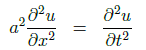

## y 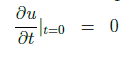

## contenidos en la explicación cuando lambda>0

## 2) u(0,t)=0

In [90]:
%%manim -ql -v WARNING WaveEquationBoundaryCondition

from manim import *

class WaveEquationBoundaryCondition(Scene):
    def construct(self):
        # Mostrar la condición de frontera u(0, t) = 0
        boundary_condition = MathTex(
            r"u(0, t) = 0"
        ).shift(UP * 3)

        self.play(Write(boundary_condition))
        self.wait(2)

        # Mostrar la serie de Fourier generalizada
        fourier_series = MathTex(
            r"u(x, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi x}{L}\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(\frac{n\pi x}{L}\right) \sin\left(\frac{n\pi c t}{L}\right) \right]"
        ).next_to(boundary_condition, DOWN, buff=0.5).scale(0.6)

        self.play(Write(fourier_series))
        self.wait(2)

        # Aplicar la condición de frontera u(0, t) = 0
        apply_condition = MathTex(
            r"u(0, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(0\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(0\right) \sin\left(\frac{n\pi c t}{L}\right) \right] = 0"
        ).next_to(fourier_series, DOWN, buff=0.5).scale(0.6)

        self.play(Write(apply_condition))
        self.wait(2)

        # Mostrar que la condición se satisface naturalmente
        satisfied_condition = MathTex(
            r"\sin(0) = 0 \text{ implica que } u(0, t) = 0 \text{ para cualquier } t"
        ).next_to(apply_condition, DOWN, buff=0.5).scale(0.6)

        self.play(Write(satisfied_condition))
        self.wait(2)

        # Eliminar las ecuaciones anteriores para dejar espacio a las nuevas
        self.play(FadeOut(boundary_condition), FadeOut(fourier_series), FadeOut(apply_condition))
        self.wait(1)

        # Desplazar el resultado hacia arriba
        self.play(satisfied_condition.animate.shift(UP * 2))
        self.wait(1)

        # Mostrar el resultado final para la serie de Fourier con la condición aplicada
        final_fourier_series = MathTex(
            r"u(x, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi x}{L}\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(\frac{n\pi x}{L}\right) \sin\left(\frac{n\pi c t}{L}\right) \right]"
        ).next_to(satisfied_condition, DOWN, buff=0.5).scale(0.6)

        self.play(Write(final_fourier_series))
        self.wait(2)

        # Eliminar todas las ecuaciones para finalizar
        self.play(FadeOut(satisfied_condition), FadeOut(final_fourier_series))
        self.wait(1)

In [91]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationBoundaryCondition()
scene.render()

## 3) u(L,t)=0

In [92]:
%%manim -ql -v WARNING WaveEquationBoundaryConditionL

from manim import *

class WaveEquationBoundaryConditionL(Scene):
    def construct(self):
        # Mostrar la condición de frontera u(L, t) = 0
        boundary_condition = MathTex(
            r"u(L, t) = 0"
        ).shift(UP * 3)

        self.play(Write(boundary_condition))
        self.wait(2)

        # Mostrar la serie de Fourier generalizada
        fourier_series = MathTex(
            r"u(x, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi x}{L}\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(\frac{n\pi x}{L}\right) \sin\left(\frac{n\pi c t}{L}\right) \right]"
        ).scale(0.6).next_to(boundary_condition, DOWN, buff=0.5)

        self.play(Write(fourier_series))
        self.wait(2)

        # Aplicar la condición de frontera u(L, t) = 0
        apply_condition = MathTex(
            r"u(L, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi L}{L}\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(\frac{n\pi L}{L}\right) \sin\left(\frac{n\pi c t}{L}\right) \right] = 0"
        ).scale(0.6).next_to(fourier_series, DOWN, buff=0.5)

        self.play(Write(apply_condition))
        self.wait(2)

        # Mostrar que la condición se satisface naturalmente
        satisfied_condition = MathTex(
            r"\sin\left(\frac{n\pi L}{L}\right) = \sin(n\pi) = 0 \text{ implica que } u(L, t) = 0 \text{ para cualquier } t"
        ).scale(0.6).next_to(apply_condition, DOWN, buff=0.5)

        self.play(Write(satisfied_condition))
        self.wait(2)

        # Eliminar las ecuaciones anteriores para dejar espacio a las nuevas
        self.play(FadeOut(boundary_condition), FadeOut(fourier_series), FadeOut(apply_condition))
        self.wait(1)

        # Desplazar el resultado hacia arriba
        self.play(satisfied_condition.animate.shift(UP * 2))
        self.wait(1)

        # Mostrar el resultado final para la serie de Fourier con la condición aplicada
        final_fourier_series = MathTex(
            r"u(x, t) = \sum_{n=1}^{\infty} \left[ a_n \sin\left(\frac{n\pi x}{L}\right) \cos\left(\frac{n\pi c t}{L}\right) + b_n \sin\left(\frac{n\pi x}{L}\right) \sin\left(\frac{n\pi c t}{L}\right) \right]"
        ).scale(0.6).next_to(satisfied_condition, DOWN, buff=0.5)

        self.play(Write(final_fourier_series))
        self.wait(2)

        # Eliminar todas las ecuaciones para finalizar
        self.play(FadeOut(satisfied_condition), FadeOut(final_fourier_series))
        self.wait(1)


In [93]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationBoundaryConditionL()
scene.render()

## 4) u(x,0)= 1/4x(L-x)

In [94]:
%%manim -ql -v WARNING WaveEquationBoundaryCondition4

from manim import *

class WaveEquationBoundaryCondition4(Scene):
    def construct(self):
        # Mostrar la condición inicial para a_n
        initial_condition_an = MathTex(
            r"u(x,0) = \sum_{n=1}^{\infty} a_n \sin\left(\frac{n\pi}{L} x\right) = \frac{1}{4} x (L - x)"
        ).shift(UP * 2)

        self.play(Write(initial_condition_an))
        self.wait(2)

        # Plantear la integral para encontrar a_n
        integral_an = MathTex(
            r"a_n = \frac{2}{L} \int_{0}^{L} \frac{1}{4} x (L - x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(initial_condition_an, DOWN, buff=0.5)

        self.play(Write(integral_an))
        self.wait(2)

        # Desaparecer las ecuaciones anteriores para evitar solapamiento
        self.play(FadeOut(initial_condition_an), FadeOut(integral_an))
        self.wait(1)

        # Mostrar la condición inicial para b_n
        initial_condition_bn = MathTex(
            r"\frac{\partial u}{\partial t} \bigg|_{t=0} = \sum_{n=1}^{\infty} b_n \frac{cn\pi}{L} \sin\left(\frac{n\pi}{L} x\right) = g(x)"
        ).shift(UP * 2)

        self.play(FadeIn(initial_condition_bn))
        self.wait(2)

        # Mostrar el primer paso para encontrar b_n
        bn_step1 = MathTex(
            r"b_n \frac{cn\pi}{L} = \frac{2}{L} \int_{0}^{L} g(x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(initial_condition_bn, DOWN, buff=0.5)

        self.play(Write(bn_step1))
        self.wait(2)

        # Mostrar el segundo paso para encontrar b_n
        bn_step2 = MathTex(
            r"b_n = \frac{2}{cn\pi} \int_{0}^{L} g(x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(bn_step1, DOWN, buff=0.5)

        self.play(Write(bn_step2))
        self.wait(2)

In [95]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationBoundaryCondition4()
scene.render()

In [96]:
%%manim -ql -v WARNING WaveEquationBoundaryCondition5

from manim import *

class WaveEquationBoundaryCondition5(Scene):
    def construct(self):
        # Mostrar la condición inicial para a_n
        initial_condition_an = MathTex(
            r"u(x,0) = \sum_{n=1}^{\infty} a_n \sin\left(\frac{n\pi}{L} x\right) = \frac{1}{4} x (L - x)"
        ).shift(UP * 3)

        self.play(Write(initial_condition_an))
        self.wait(2)

        # Plantear la integral para encontrar a_n
        integral_an = MathTex(
            r"a_n = \frac{2}{L} \int_{0}^{L} \frac{1}{4} x (L - x) \sin\left(\frac{n\pi}{L} x\right) dx"
        ).next_to(initial_condition_an, DOWN, buff=0.5)

        self.play(Write(integral_an))
        self.wait(2)

        # Mostrar el primer paso de la integración por partes para a_n
        step1_an = MathTex(
            r"u = x (L - x), \quad dv = \sin\left(\frac{n\pi x}{L}\right) dx"
        ).next_to(integral_an, DOWN, buff=0.5)

        self.play(Write(step1_an))
        self.wait(2)

        # Eliminar las ecuaciones anteriores para dejar espacio a las nuevas
        self.play(FadeOut(initial_condition_an), FadeOut(integral_an))
        self.wait(1)

        # Desplazar el primer paso hacia arriba
        self.play(step1_an.animate.shift(UP * 2))
        self.wait(1)

        # Mostrar el segundo paso de la integración por partes para a_n
        step2_an = MathTex(
            r"du = (L - 2x) dx, \quad v = -\frac{L}{n\pi} \cos\left(\frac{n\pi x}{L}\right)"
        ).next_to(step1_an, DOWN, buff=0.5)

        self.play(Write(step2_an))
        self.wait(2)

        # Mostrar el resultado de la integración por partes para a_n
        result_part1_an = MathTex(
            r"\int_{0}^{L} x (L - x) \sin\left(\frac{n\pi x}{L}\right) dx = \left[ -\frac{L}{n\pi} x (L - x) \cos\left(\frac{n\pi x}{L}\right) \right]_{0}^{L}"
        ).next_to(step2_an, DOWN, buff=0.5)

        self.play(Write(result_part1_an))
        self.wait(2)

        # Eliminar las ecuaciones anteriores para dejar espacio a las nuevas
        self.play(FadeOut(step1_an), FadeOut(step2_an))
        self.wait(1)

        # Desplazar el resultado hacia arriba
        self.play(result_part1_an.animate.shift(UP * 2))
        self.wait(1)

        # Mostrar el siguiente paso de la integración por partes para a_n
        result_part2_an = MathTex(
            r"+ \frac{L}{n\pi} \int_{0}^{L} (L - 2x) \cos\left(\frac{n\pi x}{L}\right) dx"
        ).next_to(result_part1_an, DOWN, buff=0.5)

        self.play(Write(result_part2_an))
        self.wait(2)

        # Mostrar el resultado final para a_n (ejemplo simbólico)
        result_an = MathTex(
            r"a_n = \frac{2}{L} \left[ \text{Resultado final de la integral} \right]"
        ).next_to(result_part2_an, DOWN, buff=0.5)

        self.play(Write(result_an))
        self.wait(2)

        # Eliminar todas las ecuaciones para finalizar
        self.play(FadeOut(result_part1_an), FadeOut(result_part2_an), FadeOut(result_an))
        self.wait(1)

In [97]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationBoundaryCondition5()
scene.render()

## Aplicaciones:

In [98]:
%%manim -ql -v WARNING WaveEquationEngineeringApplications

from manim import *

class WaveEquationEngineeringApplications(Scene):
    def construct(self):
        # Interpretación Física de la Ecuación de Onda
        wave_equation_text = Text(
            "Interpretación Física de la Ecuación de Onda"
        ).scale(0.7).shift(UP * 3)

        wave_equation_formula = MathTex(
            r"\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}"
        ).scale(0.7).next_to(wave_equation_text, DOWN, buff=0.3)

        wave_interpretation = Text(
            "Describe cómo se propagan las ondas en un medio.\n"
            "u(x, t) es la desviación, c es la velocidad de propagación."
        ).scale(0.5).next_to(wave_equation_formula, DOWN, buff=0.3)

        self.play(Write(wave_equation_text))
        self.play(Write(wave_equation_formula))
        self.play(Write(wave_interpretation))

        self.wait(2)

        self.play(FadeOut(wave_equation_text), FadeOut(wave_equation_formula), FadeOut(wave_interpretation))
        
        # Ondas Viajeras y Estacionarias
        wave_types_text = Text("Ondas Viajeras y Estacionarias").scale(0.7).shift(UP * 3)
        self.play(Write(wave_types_text))
        self.wait(2)

        traveling_waves = Text(
            "Ondas Viajeras: Se desplazan sin cambiar su forma."
        ).scale(0.5).shift(UP * 2)

        traveling_wave_formula = MathTex(
            r"u(x, t) = A \cos(kx - \omega t)"
        ).scale(0.5).next_to(traveling_waves, DOWN, buff=0.3)

        standing_waves = Text(
            "Ondas Estacionarias: Superposición de dos ondas viajeras."
        ).scale(0.5).next_to(traveling_wave_formula, DOWN, buff=0.5)

        standing_wave_formula = MathTex(
            r"u(x, t) = \sin\left(\frac{n\pi x}{L}\right) \cos\left(\frac{n\pi c t}{L}\right)"
        ).scale(0.5).next_to(standing_waves, DOWN, buff=0.3)

        self.play(Write(traveling_waves))
        self.play(Write(traveling_wave_formula))
        self.play(Write(standing_waves))
        self.play(Write(standing_wave_formula))

        self.wait(2)

        self.play(FadeOut(traveling_waves), FadeOut(traveling_wave_formula), FadeOut(standing_waves), FadeOut(standing_wave_formula), FadeOut(wave_types_text))

        # Aplicaciones en Ingeniería Mecánica
        engineering_applications = Text(
            "Aplicaciones en Ingeniería Mecánica"
        ).scale(0.7).shift(UP * 3)

        applications_list = BulletedList(
            "Vibraciones de Componentes Mecánicos",
            "Acústica y Ruido",
            "Ensayos No Destructivos (NDT)"
        ).scale(0.5).next_to(engineering_applications, DOWN, buff=0.3)

        self.play(Write(engineering_applications))
        self.play(Write(applications_list))

        self.wait(2)

        self.play(FadeOut(engineering_applications), FadeOut(applications_list))

        # Información adicional sobre aplicaciones
        additional_info = Text(
            "Vibraciones: Se usa la ecuación de onda para analizar vibraciones\n"
            "en piezas mecánicas, asegurando su integridad y eficiencia.\n"
            "Acústica: Modela la propagación de ondas sonoras para reducir ruido.\n"
            "NDT: Usa ultrasonido para detectar defectos en materiales."
        ).scale(0.5).shift(UP * 0.5)

        self.play(Write(additional_info))

        self.wait(2)

In [99]:
# Renderizar la animación
from manim import config

config.media_width = "75%"
config.media_embed = True

# Crear y renderizar la escena
scene = WaveEquationEngineeringApplications()
scene.render()